In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" #model will be trained on GPU 0

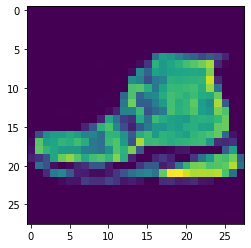

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 691us/sample - loss: 0.7806 - accuracy: 0.7345 - val_loss: 0.4890 - val_accuracy: 0.8270
Epoch 2/50
48000/48000 [==============================] - 24s 499us/sample - loss: 0.4465 - accuracy: 0.8438 - val_loss: 0.4133 - val_accuracy: 0.8510
Epoch 3/50
48000/48000 [==============================] - 29s 601us/sample - loss: 0.3905 - accuracy: 0.8629 - val_loss: 0.3578 - val_accuracy: 0.8761
Epoch 4/50
48000/48000 [==============================] - 25s 522us/sample - loss: 0.3556 - accuracy: 0.8748 - val_loss: 0.3375 - val_accuracy: 0.8830
Epoch 5/50
48000/48000 [==============================] - 25s 514us/sample - loss: 0.3349 - accuracy: 0.8829 - val_loss: 0.3212 - val_accuracy: 0.8869
Epoch 6/50
48000/48000 [==============================] - 23s 486us/sample - loss: 0.3192 - accuracy: 0.8873 - val_loss: 0.3085 - val_accuracy: 0.8946
Epoch 7/50
48000/48000 [====================

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import TensorBoard
num_classes = 10
epochs = 5

train_df = pd.read_csv('/home/vineeth/Datasets/FashionMNIST/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/home/vineeth/Datasets/FashionMNIST/fashion-mnist_test.csv', sep = ',')

train_df.head()

test_df.head()

train_data = np.array(train_df, dtype = 'float32')

test_data = np.array(test_df, dtype='float32')

x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 80085)

image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

image_rows = 28

image_cols = 28

batch_size = 512

image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']

val_accuracy = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')

plt.title('Training and Validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

### Classification Report
# We can summarize the performance of our classifier as follows

#get the predictions for the test data

predicted_classes = cnn_model.predict_classes(x_test)
# predicted_classes = pd.Series(predicted_classes)

#get the indices to be plotted

y_true = test_df.iloc[:, 0]
y_true = y_true.to_numpy()

# p = predicted_classes[:10000]
# y = y_true[:10000]

correct = np.nonzero(predicted_classes==y_true)[0]

incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_true, predicted_classes, target_names=target_names))



for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()